In [17]:
import pandas as pd 
data=pd.read_csv('modified-titanic-passengers.csv')
data


,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,13.0000,0,S,Mr,0
1,1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,7.6500,F G73,S,Mr,0
2,2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,7.8542,0,S,Mr,0
3,3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,21.0750,0,S,Mrs,4
4,4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,52.0000,B71,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,0,C,Mrs,1
887,887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,7.2292,0,C,Mr,0
888,888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,8.6625,0,S,Miss,0
889,889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,7.8958,0,S,Mr,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Name        891 non-null    object 
 4   Sex         891 non-null    object 
 5   Age         891 non-null    float64
 6   SibSp       891 non-null    int64  
 7   Parch       891 non-null    int64  
 8   Fare        891 non-null    float64
 9   Cabin       891 non-null    object 
 10  Embarked    891 non-null    object 
 11  Title       891 non-null    object 
 12  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns




In [20]:
x = data[['Pclass','Age','FamilySize']]
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

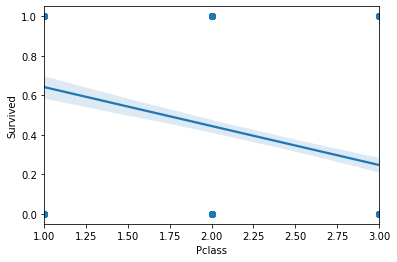

In [21]:
sns.regplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

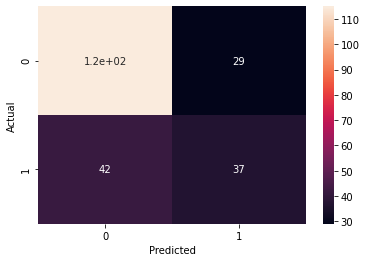

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       144
           1       0.56      0.47      0.51        79

    accuracy                           0.68       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.68      0.67       223



In [24]:
# the ROC receiver operating characteristic is a curve that is represented using the true positives and the false positives 
# The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability
#of a classifier to distinguish between classes and is used as a summary of the ROC curve.


In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.6334827707454291

In [46]:
from sklearn.metrics import roc_curve ,plot_roc_curve 

fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

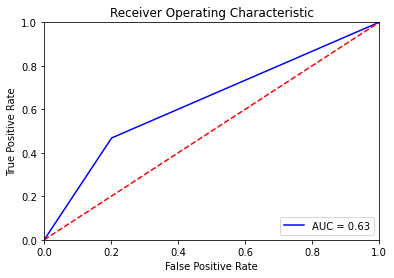

In [47]:
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()